# Pluralsight Data Science Project

The dataset provided by Pluralsight represent existing Pluralsight users's information, with at least one subscription


By following the table of contents, I will build out that can be used for different situations. 


## Table of Contents

I. [Load and Clean Dataset](#Load)<br>
II. [Exploratory Data Analysis](#Exploratory)<br>
III. [Modeling](#Modeling)<br>
IV. [Final Steps](#Final)<br>
V. [Question & Concluding](#conclusions)

Let's get started by importing the necessary libraries and reading in the data.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <a class="anchor" id="Load">Part I :Load and Clean Dataset</a>

In this workspace, the dataset file is `Pluralsight.csv`. Load and clean the dataset, checking for invalid or missing data - for example, records with null or missing values. 

In [2]:
# Load and check basic information of dataset
df = pd.read_csv('Pluralsight.csv')
df.head()

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,Channel,AutoRenewOn,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,CountryCode,Company,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar
0,5,social-media-productions,10/10/13,STD,29.00,4/17/15,5/17/15,Renewal,Renewed,19,Direct,yes,19,19,19,US,1972,0,0,0,0.176471,0.0,13.0,10.737255,60.844444,6.941176,39.333333,0.176471,0.212801,0.419307,Software Development
1,13,hotmail,4/16/10,PLUS,16.81,6/30/15,8/1/15,Reactivation,Renewed,64,Email,yes,3,8,8,CA,6203892 Canada Inc.,0,2,0,0.473684,0.0,3.0,10.529825,22.229630,3.368421,7.111111,0.157895,0.190862,0.404102,Software Development
2,28,hotmail,9/6/12,STD,29.00,4/28/15,5/28/15,Renewal,Renewed,33,Direct,yes,25,4,21,FO,NaN,0,1,0,0.000000,0.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3,51,gmail,12/8/13,STD,29.00,5/11/15,6/11/15,Renewal,Renewed,18,Direct,yes,13,10,10,US,Oracle,0,1,0,0.055556,0.0,11.0,1.068519,19.233333,0.277778,5.000000,0.055556,0.116957,0.116957,Software Development
4,56,live,7/11/13,PLUS,49.00,8/23/15,9/23/15,Renewal,Renewed,26,Email,yes,26,26,26,US,NaN,0,0,0,0.055556,0.0,2.0,1.725926,31.066667,0.333333,6.000000,0.055556,0.139678,0.139678,IT Pro


In [3]:
# column informations
df.columns

Index(['SubscriberKey', 'EmailDomain', 'AccountCreatedDate', 'ProductType',
       'BilledAmount', 'StartDate', 'EndDate', 'BeginningState', 'EndingState',
       'TenureMonth', 'Channel', 'AutoRenewOn', 'NActiveMonths',
       'NContinuousActiveMonths', 'MaxContinuousActiveMonths', 'CountryCode',
       'Company', 'StartTrial', 'NPrevChurns', 'TurnAutoRenewOff',
       'PercActiveDay', 'PercOfflineView', 'DaysSinceLastLogin',
       'ViewMinPerDay', 'ViewMinPerActiveDay', 'ClipsPerDay',
       'ClipsPerActiveDay', 'NCoursesPerDay', 'CourseCompletionRate',
       'MaxCourseCompletionRate', 'CoursePillar'],
      dtype='object')

### Statistics 
Showing the statistics of the whole dataset

In [4]:
# Total rows
df.count()

SubscriberKey                43142
EmailDomain                  43142
AccountCreatedDate           43142
ProductType                  43142
BilledAmount                 43142
StartDate                    43142
EndDate                      43142
BeginningState               43142
EndingState                  43142
TenureMonth                  43142
Channel                      34612
AutoRenewOn                  42959
NActiveMonths                43142
NContinuousActiveMonths      43142
MaxContinuousActiveMonths    43142
CountryCode                  43113
Company                      19313
StartTrial                   43142
NPrevChurns                  43142
TurnAutoRenewOff             43142
PercActiveDay                43142
PercOfflineView              43142
DaysSinceLastLogin           42509
ViewMinPerDay                43142
ViewMinPerActiveDay          43142
ClipsPerDay                  43142
ClipsPerActiveDay            43142
NCoursesPerDay               43142
CourseCompletionRate

In [5]:
# Number of unique user
unique_user = df.SubscriberKey.nunique()
print (unique_user)

41949


In [6]:
# dataset statistic
for col in df.columns:
    print (df[col].describe())

count     43142.000000
mean     248761.727018
std      155645.849586
min           5.000000
25%      111502.500000
50%      232250.500000
75%      424287.000000
max      500558.000000
Name: SubscriberKey, dtype: float64
count     43142
unique    12476
top       gmail
freq      16894
Name: EmailDomain, dtype: object
count       43142
unique       1928
top       2/13/13
freq          460
Name: AccountCreatedDate, dtype: object
count     43142
unique        2
top         STD
freq      25334
Name: ProductType, dtype: object
count    43142.000000
mean        36.191337
std         10.670588
min          2.990000
25%         29.000000
50%         29.000000
75%         49.000000
max         49.000000
Name: BilledAmount, dtype: float64
count      43142
unique       181
top       7/1/15
freq        3282
Name: StartDate, dtype: object
count      43142
unique        29
top       8/1/15
freq        4112
Name: EndDate, dtype: object
count       43142
unique          5
top       Renewal
freq        3

### Finding Missing Value

In [0]:
def count_missing(df,col):
    return (df[col].isnull().mean())*df[col].count()

In [8]:
for col in df.columns:
    missing_count = count_missing(df, col)
    if missing_count > 0:
        print("{}: {}".format(col, missing_count))

Channel: 6843.455565342359
AutoRenewOn: 182.22374947846646
CountryCode: 28.980506235223217
Company: 10667.319016271846
DaysSinceLastLogin: 623.7123220991145


In [0]:
# Build up the function for finding missing value in each column
def missing_value(df):
    # find percentage of missing value for each column
    missing_df = df.isnull().mean()*100
    #filter our only columns, which have missing values
    with_nan_df = missing_df[missing_df > 0]
    return with_nan_df

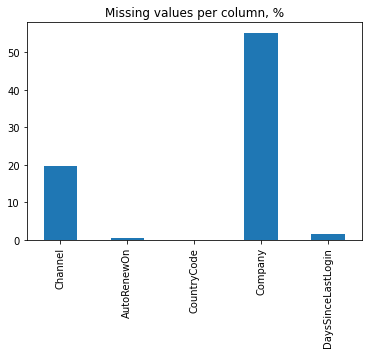

In [10]:
#plot the result
with_nan_df_1= missing_value(df)
with_nan_df_1.plot.bar(title = 'Missing values per column, %')

According to the graph above, over 50% of the data in Company is missing, and there are also almost 20% of the data is missing in the channel column. therefore it is not necessary to analyze with company and channel column.
The rows with null or empty value in AutoRenewOn, CountryCode and DaysSinceLast Login will be delete

In [0]:
# drop Company, channel columns
df = df.drop(['Company','Channel'],axis = 1)

In [0]:
# drop missing rows in the columns with missing values
df_non_null = df.dropna(how = 'any', subset = ["AutoRenewOn","CountryCode","DaysSinceLastLogin"])

In [13]:
# Checking the columns rows number before and after cleaning with missing values
print("{}".format(df.count()))
print("df_non_null: {}".format(df_non_null.count())) # no missing values
print("{} rows have been removed.".format(df.count() - df_non_null.count()))

SubscriberKey                43142
EmailDomain                  43142
AccountCreatedDate           43142
ProductType                  43142
BilledAmount                 43142
StartDate                    43142
EndDate                      43142
BeginningState               43142
EndingState                  43142
TenureMonth                  43142
AutoRenewOn                  42959
NActiveMonths                43142
NContinuousActiveMonths      43142
MaxContinuousActiveMonths    43142
CountryCode                  43113
StartTrial                   43142
NPrevChurns                  43142
TurnAutoRenewOff             43142
PercActiveDay                43142
PercOfflineView              43142
DaysSinceLastLogin           42509
ViewMinPerDay                43142
ViewMinPerActiveDay          43142
ClipsPerDay                  43142
ClipsPerActiveDay            43142
NCoursesPerDay               43142
CourseCompletionRate         43142
MaxCourseCompletionRate      43142
CoursePillar        

In [14]:
# unique user numbers
df.SubscriberKey.nunique()

41949

## <a class="anchor" id="Exploratory">Part II : Exploratory Data Analysis</a>

#### some insight into the descriptive statistics of the data.

In [15]:
df_non_null.dtypes

SubscriberKey                  int64
EmailDomain                   object
AccountCreatedDate            object
ProductType                   object
BilledAmount                 float64
StartDate                     object
EndDate                       object
BeginningState                object
EndingState                   object
TenureMonth                    int64
AutoRenewOn                   object
NActiveMonths                  int64
NContinuousActiveMonths        int64
MaxContinuousActiveMonths      int64
CountryCode                   object
StartTrial                     int64
NPrevChurns                    int64
TurnAutoRenewOff               int64
PercActiveDay                float64
PercOfflineView              float64
DaysSinceLastLogin           float64
ViewMinPerDay                float64
ViewMinPerActiveDay          float64
ClipsPerDay                  float64
ClipsPerActiveDay            float64
NCoursesPerDay               float64
CourseCompletionRate         float64
M

### Varaiable Information
Based on the information provided in the introduction sheet and above, the variables in this data set could be defined as below:

##### Target variable<br>
EndingState<br>

##### comment level features<br>
TurnAutoRenewOff<br>
BeginningState<br>
NPrevChurns<br>
StartTrial<br>
BilledAmount<br>
ProductType<br>
TenureMonth<br>
AutoRenewOn<br>
NActiveMonths<br>
NContinuousActiveMonths<br>
MaxContinuousActiveMonths<br>
PerActiveDay<br>
PerOfflineView<br>
ViewMinPerDay<br>
ViewMinPerActiveDat<br>
ClipsPerDay<br>
ClipsPerActiveDay<br>
CourseCompletionRate<br>
MaxCourseCompletionRate<br>

In [16]:
# Checking the category of some columns
for col in ['BeginningState','EndingState','ProductType','BeginningState','AutoRenewOn','CountryCode','CoursePillar']:
    print (col,df_non_null[col].unique())

BeginningState ['Renewal' 'Reactivation' 'Conversion' 'Change' 'Direct']
EndingState ['Renewed' 'Ended' 'Changed' 'Cancelled']
ProductType ['STD' 'PLUS']
BeginningState ['Renewal' 'Reactivation' 'Conversion' 'Change' 'Direct']
AutoRenewOn ['yes' 'no']
CountryCode ['US' 'CA' 'FO' 'SE' 'GB' 'DE' 'AU' 'NG' 'IN' 'IE' 'HK' 'AR' 'CH' 'DK'
 'FR' 'BR' 'NZ' 'ZA' 'LV' 'IL' 'MX' 'PL' 'IS' 'IT' 'NL' 'NO' 'CR' 'ES'
 'BE' 'SA' 'AW' 'TR' 'RO' 'PH' 'RU' 'FI' 'AT' 'UK' 'PT' 'GT' 'GR' 'GY'
 'SG' 'EC' 'AE' 'BA' 'CW' 'GE' 'ID' 'BH' 'HR' 'CO' 'MY' 'BN' 'JP' 'DO'
 'RS' 'TH' 'BG' 'TT' 'CZ' 'PE' 'SI' 'ME' 'TW' 'QA' 'MV' 'KW' 'UZ' 'BM'
 'PK' 'UY' 'CY' 'MK' 'LT' 'KZ' 'KR' 'UG' 'MU' 'NI' 'PR' 'PA' 'UA' 'CL'
 'VI' 'SR' 'HU' 'VE' 'MA' 'KH' 'OM' 'AL' 'BD' 'KY' 'SK' 'CN' 'JE' 'BS'
 'LB' 'TN' 'IQ' 'NP' 'VN' 'AF' 'AZ' 'JM' 'VU' 'LK' 'SN' 'EG' 'GG' 'MZ'
 'PY' 'LU' 'EE' 'GH' 'KE' 'MG' 'BB' 'AX' 'BW' 'AG' 'MD' 'LC' 'MT' 'FJ'
 'BO' 'JO' 'RW' 'GU' 'AM' 'CM' 'VG' 'IM' 'SL' 'GD' 'MO' 'TZ' 'GI' 'HN'
 'SV' 'NC' 'ET' 'PG' 'KG' 

##### Define Churn
Churn will be defined as when `cancelled` or `ended` events happens in the `EndingState`, and users with the events are churned users in this analysis.

Churn: `Cancelled` or `Ended`

In [17]:
# finding the user with cancellation or ended service
df_non_null[df_non_null['EndingState'].isin(['Cancelled','Ended'])]

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,AutoRenewOn,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,CountryCode,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar
13,150,thesmsgroup,6/29/12,PLUS,49.0,7/1/15,8/1/15,Renewal,Ended,37,no,18,19,19,US,0,0,1,0.000000,0.0,18.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
36,430,gmail,8/14/13,STD,29.0,8/3/15,9/3/15,Renewal,Cancelled,24,no,19,9,9,CH,0,2,1,0.111111,0.0,16.0,2.033333,18.300000,0.333333,3.000000,0.111111,0.059447,0.111579,Software Development
45,495,gmail,12/12/13,STD,29.0,3/27/15,4/27/15,Renewal,Cancelled,16,no,3,2,2,CA,0,1,1,0.000000,0.0,33.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
46,495,gmail,12/12/13,PLUS,49.0,5/5/15,6/5/15,Reactivation,Ended,17,yes,4,1,2,CA,0,2,0,0.222222,0.0,14.0,12.001852,54.008333,4.444444,20.000000,0.111111,0.493890,0.574226,Software Development
51,542,outlook,4/9/14,PLUS,24.5,8/17/15,9/18/15,Renewal,Ended,17,no,3,2,2,US,1,2,0,0.736842,0.0,0.0,143.979825,195.401191,33.947368,46.071429,0.684211,0.951275,1.000000,Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43131,500450,gmail,8/23/15,STD,29.0,8/23/15,9/23/15,Direct,Cancelled,1,no,1,1,1,US,0,0,0,0.444444,0.0,4.0,26.341670,59.268750,7.555556,17.000000,0.555556,0.244949,0.997850,Software Development
43133,500482,gmail,8/23/15,STD,29.0,8/23/15,9/23/15,Direct,Ended,1,yes,1,1,1,US,0,0,0,0.388889,0.0,0.0,26.131480,67.195240,8.222222,21.142860,0.388889,0.221403,0.762844,Software Development
43134,500489,gmail,8/23/15,STD,29.0,8/23/15,9/23/15,Direct,Ended,1,yes,1,1,1,SA,0,0,0,0.500000,0.0,0.0,65.917590,131.835200,37.833330,75.666670,0.555556,0.915449,1.000000,Software Development
43137,500534,gmail,8/23/15,STD,29.0,8/23/15,9/23/15,Direct,Ended,1,no,1,1,1,IN,0,0,0,0.500000,0.0,0.0,37.600930,75.201850,9.888889,19.777780,0.500000,0.469707,1.000000,Software Development


In [18]:
# Create new column to identify the churn action
df_non_null['churned'] = df_non_null['EndingState'].apply(lambda x:1 if x in ['Cancelled', 'Ended'] else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
#Checking churned column in dataset
df_non_null.head()

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,AutoRenewOn,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,CountryCode,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar,churned
0,5,social-media-productions,10/10/13,STD,29.00,4/17/15,5/17/15,Renewal,Renewed,19,yes,19,19,19,US,0,0,0,0.176471,0.0,13.0,10.737255,60.844444,6.941176,39.333333,0.176471,0.212801,0.419307,Software Development,0
1,13,hotmail,4/16/10,PLUS,16.81,6/30/15,8/1/15,Reactivation,Renewed,64,yes,3,8,8,CA,0,2,0,0.473684,0.0,3.0,10.529825,22.229630,3.368421,7.111111,0.157895,0.190862,0.404102,Software Development,0
2,28,hotmail,9/6/12,STD,29.00,4/28/15,5/28/15,Renewal,Renewed,33,yes,25,4,21,FO,0,1,0,0.000000,0.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0
3,51,gmail,12/8/13,STD,29.00,5/11/15,6/11/15,Renewal,Renewed,18,yes,13,10,10,US,0,1,0,0.055556,0.0,11.0,1.068519,19.233333,0.277778,5.000000,0.055556,0.116957,0.116957,Software Development,0
4,56,live,7/11/13,PLUS,49.00,8/23/15,9/23/15,Renewal,Renewed,26,yes,26,26,26,US,0,0,0,0.055556,0.0,2.0,1.725926,31.066667,0.333333,6.000000,0.055556,0.139678,0.139678,IT Pro,0


Churned rate

In [20]:
#calculate the percentage of the churned user
churned_rate = df_non_null['churned'].mean()
print ("churned: {:.2f}%".format(churned_rate * 100))

churned: 17.15%


In [21]:
df_churned = df_non_null[df_non_null.churned==1]
df_churned.head()

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,AutoRenewOn,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,CountryCode,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar,churned
13,150,thesmsgroup,6/29/12,PLUS,49.0,7/1/15,8/1/15,Renewal,Ended,37,no,18,19,19,US,0,0,1,0.000000,0.0,18.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1
36,430,gmail,8/14/13,STD,29.0,8/3/15,9/3/15,Renewal,Cancelled,24,no,19,9,9,CH,0,2,1,0.111111,0.0,16.0,2.033333,18.300000,0.333333,3.000000,0.111111,0.059447,0.111579,Software Development,1
45,495,gmail,12/12/13,STD,29.0,3/27/15,4/27/15,Renewal,Cancelled,16,no,3,2,2,CA,0,1,1,0.000000,0.0,33.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,1
46,495,gmail,12/12/13,PLUS,49.0,5/5/15,6/5/15,Reactivation,Ended,17,yes,4,1,2,CA,0,2,0,0.222222,0.0,14.0,12.001852,54.008333,4.444444,20.000000,0.111111,0.493890,0.574226,Software Development,1
51,542,outlook,4/9/14,PLUS,24.5,8/17/15,9/18/15,Renewal,Ended,17,no,3,2,2,US,1,2,0,0.736842,0.0,0.0,143.979825,195.401191,33.947368,46.071429,0.684211,0.951275,1.000000,Software Development,1


In [22]:
# Total number of users who cancelled or ended service
df_churned.SubscriberKey.nunique()

7144

##### Explore Data
In this section, data exploration will be done comparing churned users with not churned users, inspecting if there are any big differences between the two groups.

The following columns will be examined:<br><br>
ProductType : Standard and Plus product<br><br>
BeginningState :initial state<br><br>
Country Code : different country comparison<br><br>
StartTrial : Whether start with trial<br><br>
CoursePillar : general classification of course<br><br>
AutoRenewOn: The auto subscription preference<br><br>
TurnAutoRenewOff: Whether the customer turn off auto renewal

In [23]:
# Define the churn column value into not churn or churn
df_non_null['churn'] = df_non_null['churned'].apply(lambda x : 'churned' if x ==1 else 'unchurned' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_non_null.head()

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,AutoRenewOn,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,CountryCode,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar,churned,churn
0,5,social-media-productions,10/10/13,STD,29.00,4/17/15,5/17/15,Renewal,Renewed,19,yes,19,19,19,US,0,0,0,0.176471,0.0,13.0,10.737255,60.844444,6.941176,39.333333,0.176471,0.212801,0.419307,Software Development,0,unchurned
1,13,hotmail,4/16/10,PLUS,16.81,6/30/15,8/1/15,Reactivation,Renewed,64,yes,3,8,8,CA,0,2,0,0.473684,0.0,3.0,10.529825,22.229630,3.368421,7.111111,0.157895,0.190862,0.404102,Software Development,0,unchurned
2,28,hotmail,9/6/12,STD,29.00,4/28/15,5/28/15,Renewal,Renewed,33,yes,25,4,21,FO,0,1,0,0.000000,0.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0,unchurned
3,51,gmail,12/8/13,STD,29.00,5/11/15,6/11/15,Renewal,Renewed,18,yes,13,10,10,US,0,1,0,0.055556,0.0,11.0,1.068519,19.233333,0.277778,5.000000,0.055556,0.116957,0.116957,Software Development,0,unchurned
4,56,live,7/11/13,PLUS,49.00,8/23/15,9/23/15,Renewal,Renewed,26,yes,26,26,26,US,0,0,0,0.055556,0.0,2.0,1.725926,31.066667,0.333333,6.000000,0.055556,0.139678,0.139678,IT Pro,0,unchurned


##### ProductType

In [25]:
df_product_type = df_non_null[['ProductType','churn']]
df_product_type.head()

,ProductType,churn
0,STD,unchurned
1,PLUS,unchurned
2,STD,unchurned
3,STD,unchurned
4,PLUS,unchurned


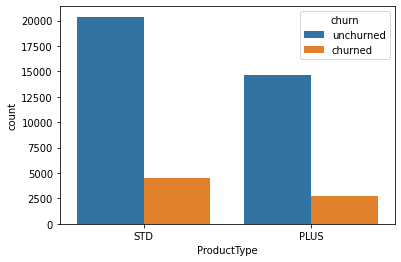

In [26]:
sns.countplot(x="ProductType", hue="churn", data=df_product_type);

##### BeginningState

In [27]:
df_BeginningState = df_non_null[['BeginningState','churn']]
df_BeginningState.head()

,BeginningState,churn
0,Renewal,unchurned
1,Reactivation,unchurned
2,Renewal,unchurned
3,Renewal,unchurned
4,Renewal,unchurned


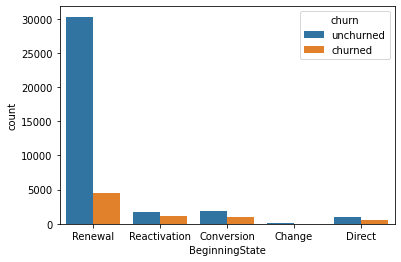

In [28]:
sns.countplot(x="BeginningState", hue="churn", data=df_BeginningState);

##### CoursePillar

In [29]:
df_CoursePillar= df_non_null[['CoursePillar','churn']]
df_CoursePillar.head()

,CoursePillar,churn
0,Software Development,unchurned
1,Software Development,unchurned
2,None,unchurned
3,Software Development,unchurned
4,IT Pro,unchurned


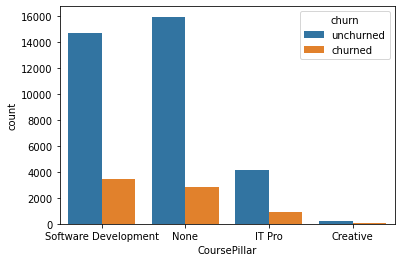

In [30]:
sns.countplot(x="CoursePillar", hue="churn", data=df_CoursePillar);

##### StartTrial

In [31]:
# 0 stands for not starting with trial, 1 stand for starting with trial
df_StartTrial= df_non_null[['StartTrial','churn']]
df_StartTrial.head()

,StartTrial,churn
0,0,unchurned
1,0,unchurned
2,0,unchurned
3,0,unchurned
4,0,unchurned


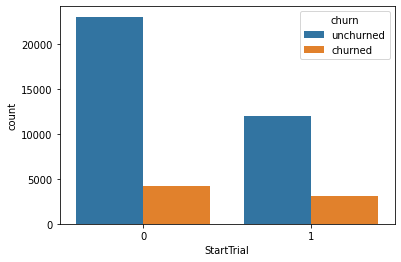

In [32]:
sns.countplot(x="StartTrial", hue="churn", data=df_StartTrial);

##### AutoRenew Preference

In [33]:
df_AutoRenewOn= df_non_null[['AutoRenewOn','churn']]
df_AutoRenewOn.head()

,AutoRenewOn,churn
0,yes,unchurned
1,yes,unchurned
2,yes,unchurned
3,yes,unchurned
4,yes,unchurned


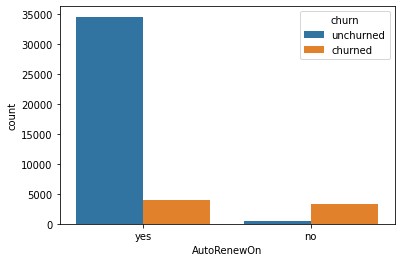

In [34]:
sns.countplot(x="AutoRenewOn", hue="churn", data=df_AutoRenewOn);

##### TurnAutoRenewOff

In [35]:
# 0 stands for yes, 1 stand for no
df_TurnAutoRenewOff= df_non_null[['TurnAutoRenewOff','churn']]
df_TurnAutoRenewOff.head()

,TurnAutoRenewOff,churn
0,0,unchurned
1,0,unchurned
2,0,unchurned
3,0,unchurned
4,0,unchurned


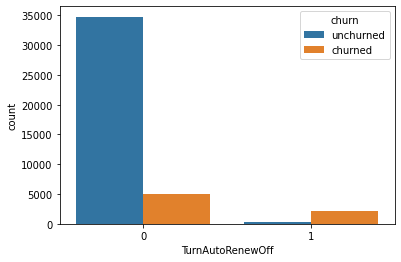

In [36]:
sns.countplot(x="TurnAutoRenewOff", hue="churn", data=df_TurnAutoRenewOff);

## <a class="anchor" id="Modeling">Part III : Modeling</a>
In the modeling section, servale tasks will be perfomed for building models. Several machine learning models will be conducted and the best suited model will be decided based on the performance results.<br>

  a.Logistic Regression<br>
  b.Random Forest classifier<br>
  c.PCA<br>
  d.binary classification model with XGBoost

### 1. Data Cleaning and Scaling
Keep the columns which are integers related

In [0]:
df_modeling = df_non_null[['SubscriberKey','BilledAmount','TenureMonth','NActiveMonths',
                           'NContinuousActiveMonths','MaxContinuousActiveMonths','NPrevChurns',
                          'PercActiveDay','PercOfflineView','DaysSinceLastLogin','ViewMinPerDay',
                          'ViewMinPerActiveDay','ClipsPerDay','ClipsPerActiveDay','NCoursesPerDay',
                          'CourseCompletionRate','MaxCourseCompletionRate','churned']]

In [38]:
df_modeling.head()

,SubscriberKey,BilledAmount,TenureMonth,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,NPrevChurns,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,churned
0,5,29.00,19,19,19,19,0,0.176471,0.0,13.0,10.737255,60.844444,6.941176,39.333333,0.176471,0.212801,0.419307,0
1,13,16.81,64,3,8,8,2,0.473684,0.0,3.0,10.529825,22.229630,3.368421,7.111111,0.157895,0.190862,0.404102,0
2,28,29.00,33,25,4,21,1,0.000000,0.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,51,29.00,18,13,10,10,1,0.055556,0.0,11.0,1.068519,19.233333,0.277778,5.000000,0.055556,0.116957,0.116957,0
4,56,49.00,26,26,26,26,0,0.055556,0.0,2.0,1.725926,31.066667,0.333333,6.000000,0.055556,0.139678,0.139678,0


### 2.Train/Test split

In [0]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_modeling,test_size = 0.2, random_state = 0)

### 3.Build models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [41]:
df_train.head()

,SubscriberKey,BilledAmount,TenureMonth,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,NPrevChurns,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,churned
14624,152883,29.0,28,21,21,21,0,0.666667,0.000000,1.0,47.907407,71.861111,15.222222,22.833333,0.833333,0.256958,0.961958,0
39597,466063,49.0,3,3,3,3,0,0.111111,0.000000,2.0,10.529630,94.766670,3.888889,35.000000,0.111111,0.999051,1.000527,0
20994,227316,49.0,12,12,12,12,0,0.111111,1.000000,0.0,0.578704,5.208333,0.166667,1.500000,0.111111,0.018019,0.031843,0
35227,439570,29.0,2,2,2,2,0,0.117647,0.000000,2.0,1.686275,14.333330,1.117647,9.500000,0.176471,0.041428,0.057740,0
14110,147640,49.0,14,9,9,9,0,0.388889,0.214018,1.0,12.338889,31.728571,5.666667,14.571429,0.500000,0.133530,0.404692,0


In [0]:
X_train = df_train.drop(['churned','SubscriberKey'],axis=1)
y_train = df_train['churned']
X_test = df_test.drop(['churned','SubscriberKey'],axis=1)
y_test = df_test['churned']

#### A. Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = lr.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7036
           1       0.63      0.04      0.07      1428

    accuracy                           0.83      8464
   macro avg       0.73      0.52      0.49      8464
weighted avg       0.80      0.83      0.77      8464



#### B. Random Forest Classifier

In [0]:
rfc = RandomForestClassifier(n_estimators =200)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7036
           1       0.40      0.15      0.21      1428

    accuracy                           0.82      8464
   macro avg       0.62      0.55      0.56      8464
weighted avg       0.77      0.82      0.78      8464



#### C. PCA

In [0]:
# scaling the dataset beform performing PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_modeling.drop(['churned','SubscriberKey'],axis=1))
scaled_df = scaler.transform(df_modeling.drop(['churned','SubscriberKey'],axis=1))

In [51]:
# Conducting PCA on Dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(scaled_df)

In [53]:
scaled_df.shape

(42316, 16)

In [54]:
x_pca.shape

(42316, 2)

Text(0, 0.5, 'Second Principal Component')

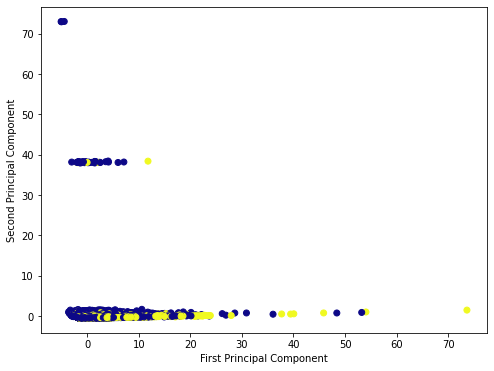

In [55]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c= df_modeling['churned'],cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [56]:
pca.components_

array([[-2.57110110e-02, -2.20172183e-02, -4.22863366e-03,
        -2.86423909e-02, -4.38257967e-03,  5.23933996e-02,
         3.39138879e-01,  6.37362151e-02, -1.69908603e-01,
         3.64031406e-01,  3.67344724e-01,  3.44459027e-01,
         3.43257176e-01,  3.37947662e-01,  3.20943982e-01,
         3.55180295e-01],
       [ 5.09781951e-03,  1.45301525e-01,  6.63677037e-01,
         3.08078300e-01,  6.62824506e-01,  5.41302040e-02,
         7.53325219e-03,  1.45948781e-02,  2.20927664e-02,
         1.24930764e-02,  3.23813204e-03,  9.66714484e-03,
         2.26607884e-03,  1.36946754e-02,  7.79691595e-05,
         2.25238909e-03]])

In [0]:
df_comp = pd.DataFrame(pca.components_, columns = [['BilledAmount','TenureMonth','NActiveMonths',
                           'NContinuousActiveMonths','MaxContinuousActiveMonths','NPrevChurns',
                          'PercActiveDay','PercOfflineView','DaysSinceLastLogin','ViewMinPerDay',
                          'ViewMinPerActiveDay','ClipsPerDay','ClipsPerActiveDay','NCoursesPerDay',
                          'CourseCompletionRate','MaxCourseCompletionRate']])

In [58]:
df_comp.head()

,BilledAmount,TenureMonth,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,NPrevChurns,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate
0,-0.025711,-0.022017,-0.004229,-0.028642,-0.004383,0.052393,0.339139,0.063736,-0.169909,0.364031,0.367345,0.344459,0.343257,0.337948,0.320944,0.355180
1,0.005098,0.145302,0.663677,0.308078,0.662825,0.054130,0.007533,0.014595,0.022093,0.012493,0.003238,0.009667,0.002266,0.013695,0.000078,0.002252


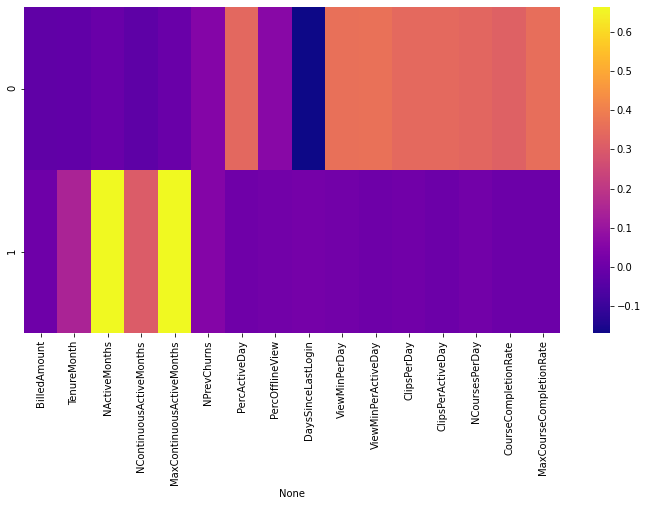

In [59]:
plt.figure(figsize = (12,6))
sns.heatmap(df_comp,cmap='plasma')

#### D. binary classification model with XGBoost

In [0]:
import xgboost
from xgboost import XGBClassifier

In [61]:
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.84


By using this simple model, we have achieve 84% accuracy

In [62]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      7036
           1       0.58      0.11      0.18      1428

    accuracy                           0.84      8464
   macro avg       0.71      0.55      0.55      8464
weighted avg       0.80      0.84      0.79      8464



We can interpret the report above as if our model tells us, 100 customers will churn, 58 of it will churn (0.67 precision). And actually, there are around 909 customers who will churn (0.11 recall). Especially recall is the main problem here, and we can improve our model’s overall performance by:
Adding more data
Adding more features
More feature engineering
Trying other models
Hyper-parameter tuning

Moving forward, let’s see how our model works in detail. First off, we want to know which features our model exactly used from the dataset. Also, which were the most important ones?
For addressing this question, we can use the code below:

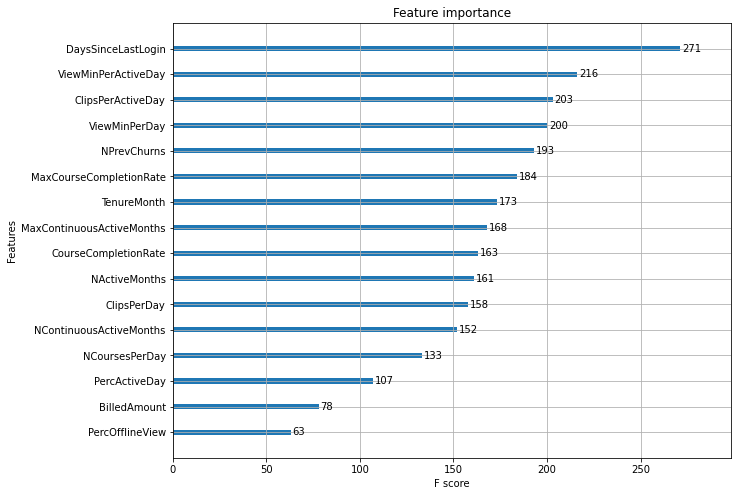

In [63]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

We can see that our model assigned more importance to DaysSinceLastLogin and ViewMinPerActiveDay compared to others.

Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [64]:
df_modeling['proba'] = xgb_model.predict_proba(df_modeling[X_train.columns])[:,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_modeling[['SubscriberKey','proba']]

,SubscriberKey,proba
0,5,0.036175
1,13,0.142065
2,28,0.114382
3,51,0.109296
4,56,0.050251
...,...,...
43137,500534,0.292621
43138,500541,0.345520
43139,500546,0.339840
43140,500547,0.345520


Calculate the average probability for each user

In [67]:
df_modeling[['SubscriberKey','proba']].groupby(['SubscriberKey']).mean()

,proba
SubscriberKey,
5,0.036175
13,0.142065
28,0.114382
51,0.109296
56,0.050251
...,...
500534,0.292621
500541,0.345520
500546,0.339840


## <a class="anchor" id="conclusions">Part V :Question & Concluding</a>

### 1.If you had the opportunity to build this dataset yourself, what types of things would you have been sure to consider?

#### Answer:
First thing that I would consider is having a Complete dataset with No missing values before I am doing further analysis on the dataset
The further features which I would prefer is Promotion date/Discount, which could have more influence on the customer purchasing

### 2.Before you begin the analysis, what types of things would you expect to influence the likelihood of whether or not a subscriber renews?

#### Answer:
Content Change/Relevant Improvement/Course Content or Website Updates/ Online Course Quality or Reviews

### 3.After exploring the dataset, what data cleansing did you do? And, what do you notice that might influence how you approach the analysis and modeling?

#### Answer:
As I show in the data cleaning part, I remove the companys and channel part since there a lot of missing value in these columns and they are not relevant to the churn activities.
However, removing missing values and possible outliers might still have influence on modeling.

### 4.Build a model to predict churn and score subscribers that are coming up for renewal. Tell us how you expect your model to perform in practice.

#### Answer:
probability of subscribers to renewal 

### 5.Describe how your model works, assuming that the audience is a non-technical marketing manager.

#### Answer:
In this project, I used the PCA algorithm to help me definded which feature in the dataset in most related with churn predictions. And then, I applied serval other different classfication algorithm, such as logistic regression, random forest Classifier to predict whether the subscriber will continue their service. And finally, I am using the binary classification in the xgboost library helping me doing a further prediction and churn probablilty calculations.

### 6.What did you learn from your analysis and modeling about the characteristics of the subscribers most at risk of not renewing?

#### Answer:
Based on the PCA analysis, which is showing in the heatmap, the subscribers with less value in 'TenureMonth','NActiveMonths','NContinuousActiveMonths','MaxContinuousActiveMonths' are more likely not renewing 

### 7.What recommendations would you make for the use of your model?

#### Answer : 
The usual way for obtaining the subscriber would be offering them promotions or discount for potenial customers, and giving Rewards to the current subscribers. 